In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, classification_report, accuracy_score, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

Download the dataset:

In [ ]:
!rm -rf data && mkdir data && curl -o data/datatest.txt -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson06/notebooks/data/datatest.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  196k  100  196k    0     0   412k      0 --:--:-- --:--:-- --:--:--  412k


This dataset describes the room occupancy (coloana *occupancy*) depending on the information such as room temperature, humidity, luminosity, CO2 quantity in the room.

Attribute Information:

- date time year-month-day hour:minute:second
- Temperature, in Celsius
- Relative Humidity, %
- Light, in Lux
- CO2, in ppm
- Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
- Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

Info about the dataset:
https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

In [ ]:
# load data
occupancy_df = pd.read_csv('data/datatest.txt', sep = ',')
occupancy_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
occupancy_df = occupancy_df.drop('date', axis = 1)

occupancy_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.7000,26.272,585.200000,749.200000,0.004764,1
141,23.7180,26.290,578.400000,760.400000,0.004773,1
142,23.7300,26.230,572.666667,769.666667,0.004765,1
143,23.7225,26.125,493.750000,774.750000,0.004744,1
144,23.7540,26.200,488.600000,779.000000,0.004767,1


Separate X and y sets (target value: occupancy):

In [ ]:
X =occupancy_df.drop('Occupancy', axis=1);
y =occupancy_df['Occupancy'];
#print(X.head());
#print(y.head());

     Temperature  Humidity       Light         CO2  HumidityRatio
140      23.7000    26.272  585.200000  749.200000       0.004764
141      23.7180    26.290  578.400000  760.400000       0.004773
142      23.7300    26.230  572.666667  769.666667       0.004765
143      23.7225    26.125  493.750000  774.750000       0.004744
144      23.7540    26.200  488.600000  779.000000       0.004767
140    1
141    1
142    1
143    1
144    1
Name: Occupancy, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42);

Creating a *Pipeline* using sklearn, whcih would contain a  scaler and the model for logisticRegression.

In [ ]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                     ('log_reg', lr)])

Training the model using *fit()*.

In [ ]:
model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

Calculate the precision and accuracy data:

In [ ]:
y_train_hat =model1.predict(X_train)
y_train_hat_probs =model1.predict_proba(X_train)[:,1];

train_accuracy =accuracy_score(y_train, y_train_hat)*100;
train_auc_roc =roc_auc_score(y_train, y_train_hat)*100;
train_recall =recall_score(y_train, y_train_hat)*100;
train_precision =precision_score(y_train, y_train_hat)*100;

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

print('Recall score: %.4f %%' % train_recall)

print('Precision score: %.4f %%' % train_precision)

Training AUC: 98.1164 %
Training accuracy: 97.7480 %
Recall score: 99.5690 %
Precision score: 94.6721 %


Repeat the above precision for the test data.

In [ ]:
y_test_hat =model1.predict(X_test)
y_test_hat_probs =model1.predict_proba(X_test)[:,1];

test_accuracy =accuracy_score(y_test, y_test_hat)*100;
test_auc_roc =roc_auc_score(y_test, y_test_hat)*100;
test_recall =recall_score(y_test, y_test_hat)*100;
test_precision =precision_score(y_test, y_test_hat)*100;

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

print('Recall score: %.4f %%' % test_recall)

print('Precision score: %.4f %%' % test_precision)

Testing AUC: 98.5687 %
Testing accuracy: 98.1250 %
Recall score: 100.0000 %
Precision score: 94.8454 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


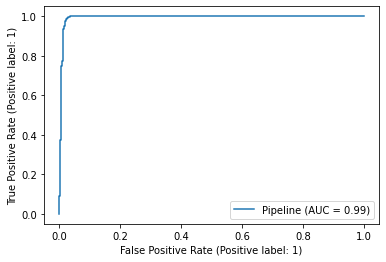

In [ ]:
plot_roc_curve(model1, X_train, y_train) 

Applying KNN on the same dataset to compare the accuracy for both methods:

The training time was: 1.7181622982025146
The accuracy of the algorithm is 0.98625, for k=1


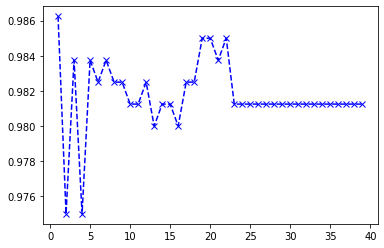

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from time import time

start =time()


accuracy_vals=[];

indx=0; 
mx=0;
iter=40;
for k in range(1, iter):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train) 
  y_hat = knn_model.predict(X_test)
  accuracy_vals.append( accuracy_score(y_test, y_hat) )
  if accuracy_vals[-1]>mx:
    mx=accuracy_vals[-1];
    indx=k;

plt.plot(range(1, iter), accuracy_vals, color='blue', marker='x', linestyle='dashed')

end=time();
print(f"The training time was: {end-start}")
print(f"The accuracy of the algorithm is {mx}, for k={indx}");